In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
clients = pd.read_csv('../data/df_final_demo.txt')
events_1 = pd.read_csv('../data/df_final_web_data_pt_1.txt')
events_2 = pd.read_csv('../data/df_final_web_data_pt_2.txt')
test = pd.read_csv('../data/df_final_experiment_clients.txt')

### Initial exploration

In [36]:
clients.shape

(70609, 9)

In [37]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [9]:
events_1.shape

(343141, 5)

In [10]:
events_2.shape

(412264, 5)

In [11]:
events = pd.concat([events_1, events_2])
events.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [12]:
events.shape

(755405, 5)

In [13]:
events.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [14]:
test.shape

(70609, 2)

In [15]:
test.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


### Exploring numerical and categorical variables

In [40]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [ ]:
clients_numerical = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
clients_categorical = ['client_id', 'gender']

In [44]:
clients['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [45]:
clients['num_accts'].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

In [39]:
clients['clnt_age'].nunique()

165

In [16]:
events.select_dtypes("number").nunique()

client_id    120157
dtype: int64

In [17]:
events['process_step'].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [18]:
events.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [19]:
events_categorical = ['client_id', 'visitor_id', 'visit_id', 'process_step']
# ordinal: process_step
events_numerical = ['date_time']

In [20]:
events['date_time'] = pd.to_datetime(events['date_time'])

In [21]:
events.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [22]:
test['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

### Data cleaning

In [46]:
clients = clients.dropna()

In [23]:
events.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [24]:
events = events.drop_duplicates()

In [25]:
test.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [26]:
test.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [27]:
# Necesitamos solo los que estan en el experimento y 
test_in = test.dropna()
test_in['Variation'] = test_in['Variation'].apply(lambda x: 1 if x == 'Test' else 0)

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\3417416057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_in['Variation'] = test_in['Variation'].apply(lambda x: 1 if x == 'Test' else 0)


In [154]:
# Necesitamos saber si estan en el experimento o no
test['experiment'] = test['Variation'].notnull().astype(int)

### Univariate Analysis

In [49]:
table_c = pd.crosstab(index = clients["num_accts"],columns="count")
table_c 

col_0,count
num_accts,
1.0,2
2.0,55496
3.0,12529
4.0,2241
5.0,284
6.0,33
7.0,8
8.0,1


C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\3211288094.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(c['bal'], color='skyblue', shade=True)


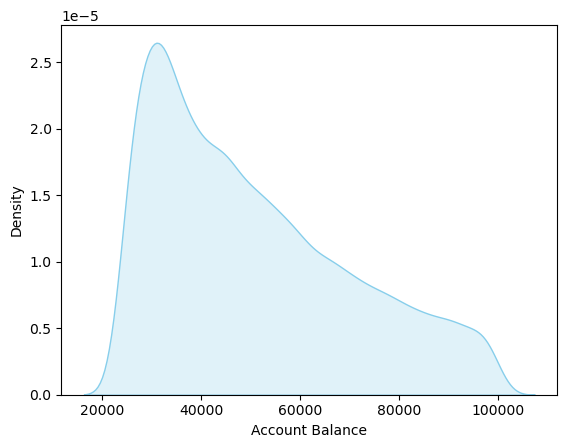

In [146]:
c = clients[clients['bal']<100000]
sns.kdeplot(c['bal'], color='skyblue', shade=True)
plt.xlabel('Account Balance')
plt.show()

In [29]:
frequency_table = events["process_step"].value_counts()
frequency_table 

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

In [30]:
table = pd.crosstab(index = events["process_step"],columns="count")
table 

col_0,count
process_step,
confirm,102506
start,234999
step_1,162797
step_2,132750
step_3,111589


In [31]:
(table/table.sum()).round(2)

col_0,count
process_step,
confirm,0.14
start,0.32
step_1,0.22
step_2,0.18
step_3,0.15


C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\362503033.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


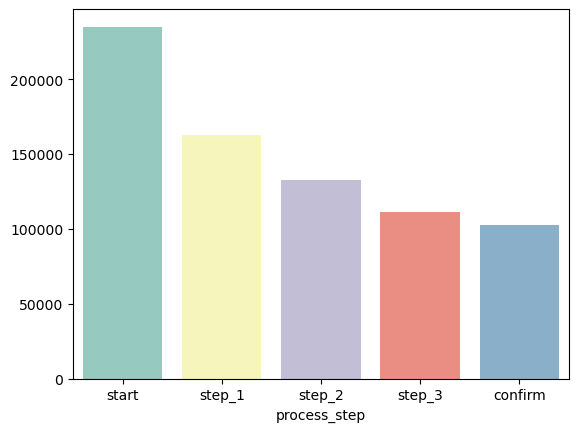

In [32]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

plt.show()

In [33]:
#sns.countplot(data=events, x='process_step', palette="Set3");
#plt.show()

###

In [34]:
events['process_step'].describe()

count     744641
unique         5
top        start
freq      234999
Name: process_step, dtype: object

# Correct client ID

In [65]:
clients = clients[clients['client_id'].isin(test_in['client_id'])]

In [66]:
test_in = test_in[test_in['client_id'].isin(clients['client_id'])]

In [69]:
events_corr = events[events['client_id'].isin(clients['client_id'])]

# Analysis about clients

In [73]:
test.head()

,client_id,Variation,experiment
0,9988021,Test,1
1,8320017,Test,1
2,4033851,Control,1
3,1982004,Test,1
4,9294070,Control,1


In [75]:
events.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [84]:
# Merging clients and events on "client_id" efficiently
clients_events = pd.merge(clients, events[['client_id', 'process_step']], on="client_id", how="inner")

# Counting how many events each client has participated in (i.e., using the online process)
client_event_counts = clients_events['client_id'].value_counts()

# Identify the top 10% of active clients (this can be changed to any other percentage if needed)
top_10_percent_threshold = int(len(client_event_counts) * 0.10)
top_clients = client_event_counts.head(top_10_percent_threshold)

# Get the demographic information of these top clients
top_client_info = clients[clients['client_id'].isin(top_clients.index)]

print(f"Number of top clients: {len(top_client_info)}")
top_client_info

Number of top clients: 5048


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
28,3055315,5.0,65.0,34.5,F,2.0,66560.69,1.0,5.0
35,2305285,14.0,168.0,54.0,M,2.0,132347.89,6.0,9.0
37,3065089,19.0,228.0,63.0,M,2.0,439723.43,6.0,9.0
39,9721424,12.0,152.0,32.0,F,2.0,29667.60,0.0,3.0
...,...,...,...,...,...,...,...,...,...
50479,1738333,7.0,90.0,68.5,U,2.0,341777.81,3.0,6.0
50480,1624825,16.0,195.0,63.5,F,2.0,106532.51,3.0,6.0
50482,9677776,5.0,70.0,64.5,U,2.0,57398.19,1.0,4.0
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0


In [88]:
age_analysis = top_client_info['clnt_age'].describe()
tenure_years_analysis = top_client_info['clnt_tenure_yr'].describe()
tenure_months_analysis = top_client_info['clnt_tenure_mnth'].describe()

print("Age Analysis:\n", age_analysis)
print("\nTenure (Years) Analysis:\n", tenure_years_analysis)
print("\nTenure (Months) Analysis:\n", tenure_months_analysis)

Age Analysis:
 count    5048.000000
mean       52.765650
std        15.385102
min        17.500000
25%        42.000000
50%        55.500000
75%        64.000000
max        94.000000
Name: clnt_age, dtype: float64

Tenure (Years) Analysis:
 count    5048.000000
mean       12.803883
std         7.277399
min         2.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        55.000000
Name: clnt_tenure_yr, dtype: float64

Tenure (Months) Analysis:
 count    5048.000000
mean      159.603605
std        87.081416
min        34.000000
25%        83.000000
50%       145.000000
75%       212.000000
max       668.000000
Name: clnt_tenure_mnth, dtype: float64


C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\4103859942.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clients['clnt_age'], color='skyblue', shade=True)


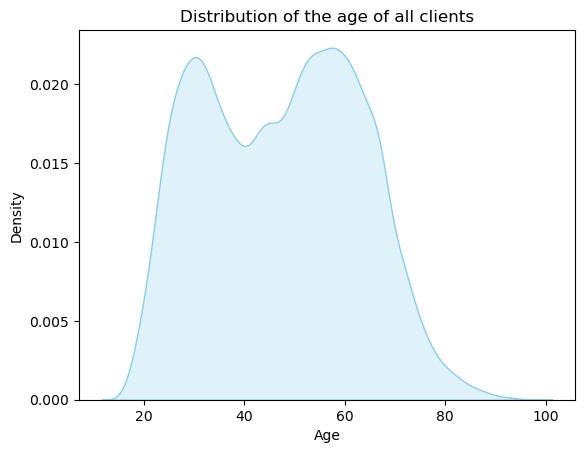

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\4103859942.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_client_info['clnt_age'], color='skyblue', shade=True)


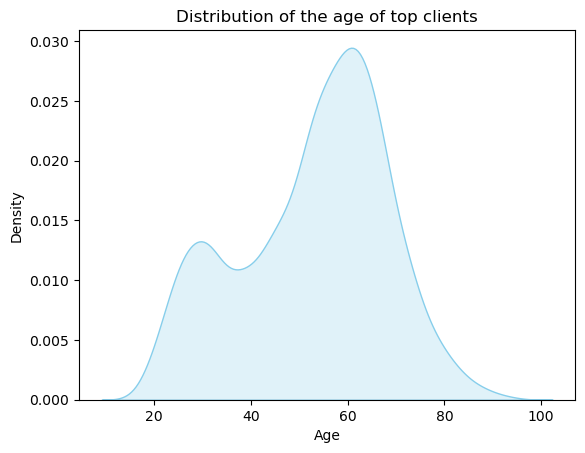

In [95]:
sns.kdeplot(clients['clnt_age'], color='skyblue', shade=True)
plt.xlabel('Age')
plt.title('Distribution of the age of all clients')
plt.show()
sns.kdeplot(top_client_info['clnt_age'], color='skyblue', shade=True)
plt.xlabel('Age')
plt.title('Distribution of the age of top clients')
plt.show()

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\1122749775.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clients['clnt_tenure_yr'], color='skyblue', shade=True)


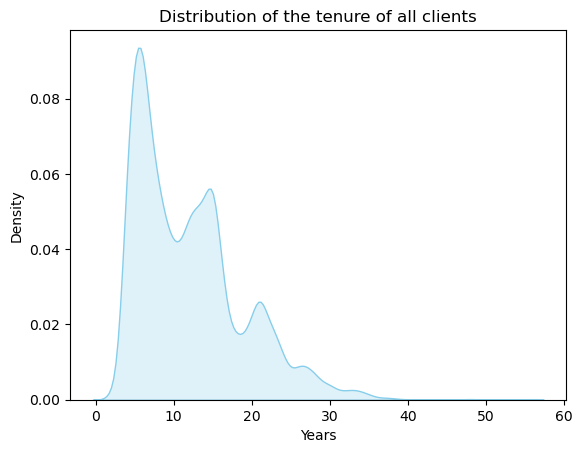

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\1122749775.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_client_info['clnt_tenure_yr'], color='skyblue', shade=True)


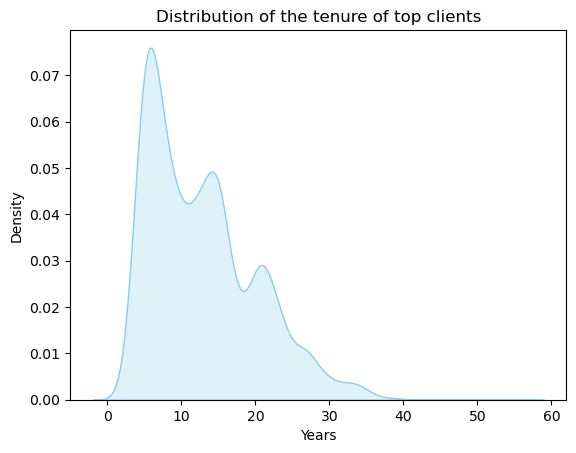

In [94]:
sns.kdeplot(clients['clnt_tenure_yr'], color='skyblue', shade=True)
plt.xlabel('Years')
plt.title('Distribution of the tenure of all clients')
plt.show()
sns.kdeplot(top_client_info['clnt_tenure_yr'], color='skyblue', shade=True)
plt.xlabel('Years')
plt.title('Distribution of the tenure of top clients')
plt.show()

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\3245863311.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_client_info['clnt_tenure_mnth'], color='skyblue', shade=True)


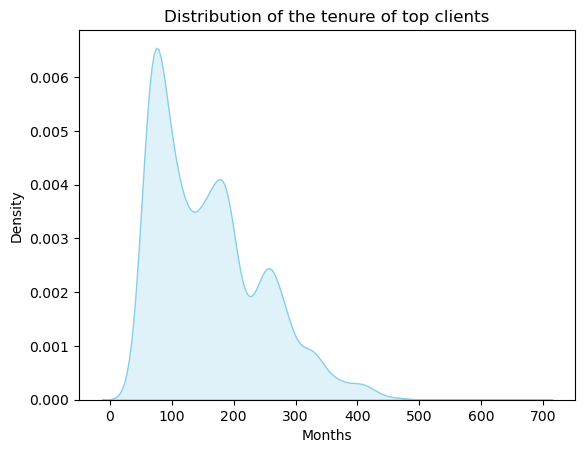

In [99]:
sns.kdeplot(top_client_info['clnt_tenure_mnth'], color='skyblue', shade=True)
plt.xlabel('Months')
plt.title('Distribution of the tenure of top clients')
plt.show()

In [89]:
balance_analysis = top_client_info['bal'].describe()
calls_analysis = top_client_info['calls_6_mnth'].describe()
logons_analysis = top_client_info['logons_6_mnth'].describe()

print("Balance Analysis:\n", balance_analysis)
print("\nCalls (Last 6 Months) Analysis:\n", calls_analysis)
print("\nLogons (Last 6 Months) Analysis:\n", logons_analysis)

Balance Analysis:
 count    5.048000e+03
mean     1.910168e+05
std      3.996731e+05
min      2.378961e+04
25%      4.568401e+04
50%      8.175343e+04
75%      1.919637e+05
max      1.632004e+07
Name: bal, dtype: float64

Calls (Last 6 Months) Analysis:
 count    5048.000000
mean        3.597068
std         2.181048
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         6.000000
Name: calls_6_mnth, dtype: float64

Logons (Last 6 Months) Analysis:
 count    5048.000000
mean        6.637480
std         2.161619
min         3.000000
25%         5.000000
50%         7.000000
75%         9.000000
max         9.000000
Name: logons_6_mnth, dtype: float64


In [90]:
# Insights Summary
print("Key Insights:")
print(f"The primary clients using the online process have an average age of {age_analysis['mean']} years.")
print(f"These clients have an average tenure of {tenure_years_analysis['mean']} years and {tenure_months_analysis['mean']} months.")
print(f"On average, these clients have an account balance of {balance_analysis['mean']} and log in {logons_analysis['mean']} times in the last 6 months.")
print(f"Additionally, they make an average of {calls_analysis['mean']} calls in the last 6 months.")


Key Insights:
The primary clients using the online process have an average age of 52.765649762282095 years.
These clients have an average tenure of 12.803882725832013 years and 159.60360538827257 months.
On average, these clients have an account balance of 191016.80021394612 and log in 6.637480190174326 times in the last 6 months.
Additionally, they make an average of 3.597068145800317 calls in the last 6 months.


In [113]:
# Sample % of the data for quicker analysis
sample_clients = clients.sample(frac=1, random_state=42)  # Adjust the fraction as needed

# Merge with events for analysis on sampled data
sample_clients_events = pd.merge(sample_clients, events[['client_id', 'process_step']], on="client_id", how="inner")

In [114]:
# Calculate mean behavior metrics for sampled clients
mean_balance = sample_clients['bal'].mean()
mean_calls = sample_clients['calls_6_mnth'].mean()
mean_logons = sample_clients['logons_6_mnth'].mean()

print(f"Average balance: {mean_balance}")
print(f"Average calls in last 6 months: {mean_calls}")
print(f"Average logons in last 6 months: {mean_logons}")


Average balance: 149516.7943833066
Average calls in last 6 months: 3.0932715352466973
Average logons in last 6 months: 6.1318557252362


In [115]:
# Merge with clients to add the test/control variation
clients_variation = pd.merge(clients, test_in, on="client_id", how="left")

# Check the behavior based on Variation (1 = Test, 0 = Control)
test_clients = clients_variation[clients_variation['Variation'] == 1]
control_clients = clients_variation[clients_variation['Variation'] == 0]

# Calculate the average balance, calls, and logons for both groups
test_balance_mean = test_clients['bal'].mean()
control_balance_mean = control_clients['bal'].mean()

test_calls_mean = test_clients['calls_6_mnth'].mean()
control_calls_mean = control_clients['calls_6_mnth'].mean()

test_logons_mean = test_clients['logons_6_mnth'].mean()
control_logons_mean = control_clients['logons_6_mnth'].mean()

print(f"Test Group - Avg Balance: {test_balance_mean}, Avg Calls: {test_calls_mean}, Avg Logons: {test_logons_mean}")
print(f"Control Group - Avg Balance: {control_balance_mean}, Avg Calls: {control_calls_mean}, Avg Logons: {control_logons_mean}")


Test Group - Avg Balance: 148962.60503171248, Avg Calls: 3.061941322651237, Avg Logons: 6.101850821557064
Control Group - Avg Balance: 150151.90018575193, Avg Calls: 3.1291762305534303, Avg Logons: 6.16624160503273


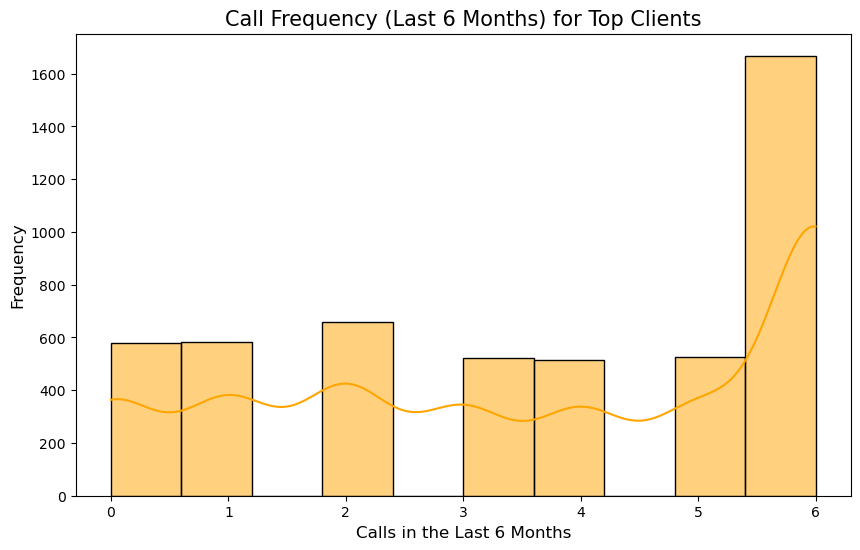

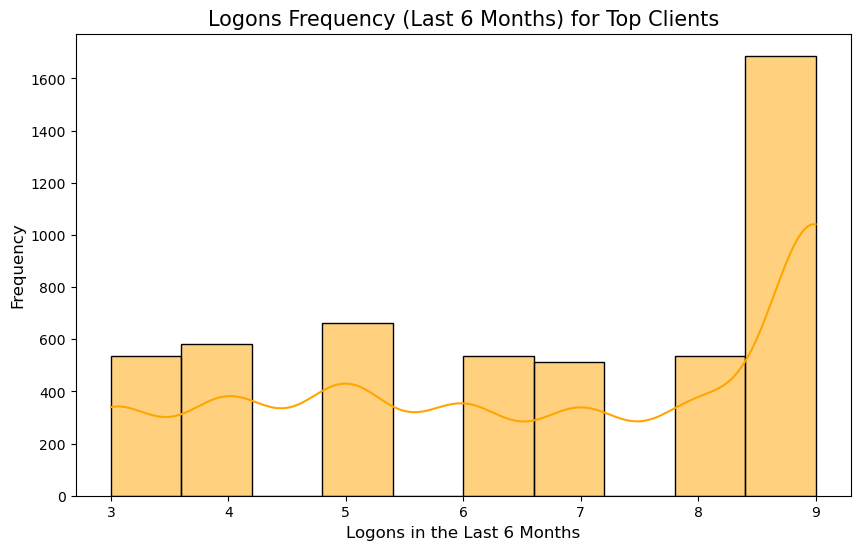

In [148]:
# Plot call frequency distribution for top clients
plt.figure(figsize=(10, 6))
sns.histplot(top_client_info['calls_6_mnth'], bins=10, kde=True, color='orange')
plt.title('Call Frequency (Last 6 Months) for Top Clients', fontsize=15)
plt.xlabel('Calls in the Last 6 Months', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(top_client_info['logons_6_mnth'], bins=10, kde=True, color='orange')
plt.title('Logons Frequency (Last 6 Months) for Top Clients', fontsize=15)
plt.xlabel('Logons in the Last 6 Months', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [163]:
# Merge the events DataFrame with the test DataFrame to get the 'Variation' (Test/Control) for each client
events_test_control = pd.merge(events, test, on='client_id', how='inner')
# Group by the 'Variation' column and count the number of events for each group
event_counts = events_test_control.groupby('Variation').size().reset_index(name='event_count')
event_counts

,Variation,event_count
0,Control,140536
1,Test,176699


C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_15796\577264953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='event_count', data=event_counts, palette='Set2')


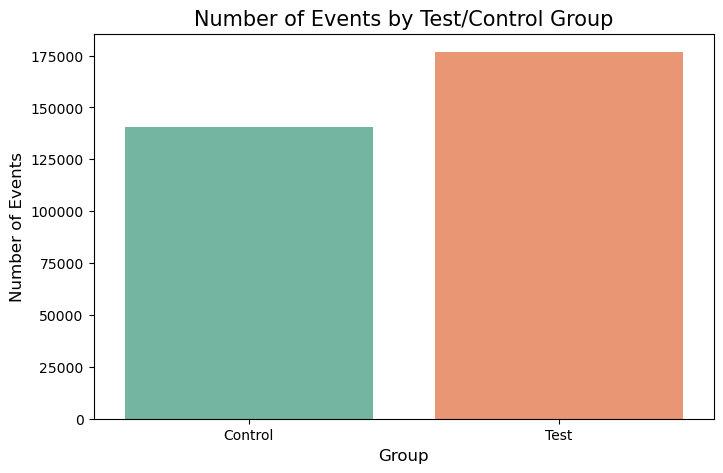

In [166]:
# Plot the number of events for Test vs Control groups
plt.figure(figsize=(8, 5))
sns.barplot(x='Variation', y='event_count', data=event_counts, palette='Set2')
plt.title('Number of Events by Test/Control Group', fontsize=15)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks([0, 1], ['Control', 'Test'])
plt.show()